# Fashion MNIST Classification with Neural Network

##Dataset Overview:
- Fashion MNIST is a dataset of 28x28 grayscale images depicting 10 different fashion categories.
- Categories include T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot.
- Each image is labeled with a corresponding class index from 0 to 9.
- The dataset is commonly used for benchmarking computer vision algorithms.

##Neural Networks Overview:
- Neural networks are a class of machine learning models inspired by the structure and function of the human brain.
- Composed of layers of interconnected nodes (neurons), neural networks can learn complex patterns and representations from data.
- Key components include input layers, hidden layers, and output layers, each containing neurons with associated weights and biases.
- Activation functions introduce non-linearity to enable the network to model complex relationships.
- Training involves adjusting weights and biases through iterative optimization algorithms to minimize a defined loss function.

##Implementation Overview:
- The code implements a neural network for Fashion MNIST classification using Python and TensorFlow/Keras.
- The dataset is loaded, preprocessed, and split into training and testing sets.
- A custom neural network class (`DeepNeuralNet`) is defined, initialized, and trained from scratch, including backpropagation for weight updates.
- Alternatively, a simpler model is defined using the Keras Sequential API, compiled, and trained with the TensorFlow backend.
- The training process involves optimizing weights to minimize the Mean Squared Error (MSE) loss.
- The model is evaluated on the test set, and predictions are made.


In [66]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
# Use the keras module to import the necessary data
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [68]:
#print some data stats
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)
print('Number of classes:', len(np.unique(y_train)))

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of classes: 10


##Flattening:

Flattening refers to the process of converting multi-dimensional data (like images) into a one-dimensional array. In this context, each image is flattened into a 1D column vector.

Purpose: Many machine learning algorithms, especially neural networks, require input data to be in a flat format. Flattening is often a preprocessing step before feeding the data into a model.

##One-Hot Encoding:

One-hot encoding is a technique used to represent categorical variables as binary vectors. In the context of neural networks and classification problems, it is commonly used to represent class labels.

Purpose: Neural networks typically output probability distributions over classes. One-hot encoding is used to represent the true class of each sample by setting the corresponding element in the vector to 1, while all other elements are set to 0. This helps in training and evaluating classification models.

In [70]:
# Flatten the training images (1D coloumn vectors).
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []
for x, y in zip(X_train, y_train):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)

# Flatten the testing images (1D coloumn vectors).
flat_test_X = []
# One hot encode the testing labels
onehot_test_y = []

for x, y in zip(X_test, y_test):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

Model Building

The DeepNeuralNet class given below is an implementation of a neural network tailored for multi-class classification using deep learning. It allows flexibility in the number of layers and neurons per layer and employs a sigmoid activation function. The class includes methods for initializing weights and biases, calculating the sigmoid function and its derivative, determining mean squared error, performing forward passes, training with stochastic gradient descent, and making predictions. The training process incorporates backpropagation to adjust weights and biases. Overall, this class serves as a customizable tool for building and training neural networks for classification tasks.

In [ ]:
class DeepNeuralNet():
    """
    A neural network class for multi-class classification using deep learning.

    Attributes:
    -----------
    layers : list
        A list containing the number of neurons in each layer, including the input and output layers.
    W : list
        A list of weight matrices for each layer in the network.
    B : list
        A list of bias vectors for each layer in the network.
    errors_ : list
        A list of errors that occur during training.

    Methods:
    --------
    initialize_weights():
        Initializes the weights and biases for the neural network.

    sigmoid(z):
        Calculates the sigmoid function value of the input.

    d_sigmoid(z):
        Calculates the derivative of the sigmoid function with respect to the input.

    mse(a, y):
        Calculates the mean squared error between the predicted and actual outputs.

    MSE(W, B, X, y):
        Calculates the mean squared error for a set of input data and corresponding targets.

    forward_pass(W, B, xi, predict_vector=False):
        Calculates the preactivation and postactivation values for each layer in the network.

    train(X_train, y_train, alpha=0.1, epochs=2):
        Trains the neural network on a set of input data and corresponding targets.

    predict(xi):
        Predicts the class of a given input vector.
    """
    def __init__(self, layers = [784, 60, 60, 10]):
        """
        Initializes a DeepNeuralNet instance.

        Parameters:
        -----------
        layers : list
            A list containing the number of neurons in each layer, including the input, hidden, and output layers.
        """
        self.layers = layers
        self.W, self.B = self.initialize_weights()

    def initialize_weights(self):
        """
        Initializes the weights and biases for the neural network.

        Returns:
        W: List of weight matrices for each layer in the network.
        B: List of bias vectors for each layer in the network.
        """
        # Initialize the weight and bias matrices for the input layer
        W = [[0.0]]
        B = [[0.0]]
        for i in range(1, len(self.layers)):
            # Initialize the weight matrix for the current layer using random values
            # multiplied by a scaling factor based on the size of the previous layer
            w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
            # Initialize the bias vector for the current layer using random values
            # multiplied by a scaling factor based on the size of the previous layer
            b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])
            W.append(w_temp)
            B.append(b_temp)
        return W, B

    def sigmoid(self, z):
        """
        Calculates the sigmoid function value of the input.

        Parameters:
        -----------
        z : float
            The input value.

        Returns:
        --------
        The sigmoid function value of the input.
        """
        return 1.0/(1.0+np.exp(-z))

    def d_sigmoid(self, z):
        """
        Calculates the derivative of the sigmoid function with respect to the input.

        Parameters:
        -----------
        z : float
            The input value.

        Returns:
        --------
        The derivative of the sigmoid function with respect to the input.
        """
        return self.sigmoid(z)*(1.0 - self.sigmoid(z))

    def mse(self, a, y):
        """
        Computes the mean squared error of the predicted output a and the actual output y.

        Parameters:
        a: The predicted output.
        y: The actual output.

        Returns:
        The mean squared error between a and y.
        """
        return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

    def MSE(self, W, B, X, y):
        """
        Computes the mean squared error for a given set of parameters and inputs.

        Parameters:
        W (list of numpy arrays): The weight matrices.
        B (list of numpy arrays): The bias vectors.
        X (numpy array): The input data.
        y (numpy array): The output data.

        Returns:
        The mean squared error for the given set of parameters and inputs.
        """
        cost = 0.0
        m = 0
        for xi, yi in zip(X, y):
            a = self.forward_pass(W, B, xi, predict_vector = True)
            cost += self.mse(a, yi)
            m+=1
        return cost/m

    def forward_pass(self, W, B, xi, predict_vector = False):
        """
        Computes the preactivation and postactivation values of each layer in the neural network for a given input.

        Parameters:
        W (list of numpy arrays): The weight matrices.
        B (list of numpy arrays): The bias vectors.
        xi (numpy array): The input to the neural network.
        predict_vector (bool): Whether to return only the output of the last layer or the preactivation and postactivation values of all layers.

        Returns:
        If predict_vector is False, returns a tuple (Z, A) where Z is a list of preactivation values and A is a list of postactivation values.
        If predict_vector is True, returns only the output of the last layer.
        """
        Z = [[0.0]]
        A = [xi]
        L = len(W) - 1
        for i in range(1, L + 1):
            z = W[i] @ A[i-1] + B[i]
            Z.append(z)

            a = self.sigmoid(z)
            A.append(a)

        if predict_vector == False:
            return Z, A
        else:
            return A[-1]

    def train(self, X_train, y_train, alpha = 0.1, epochs = 2):
        """Train the neural network on the input data.

        Parameters:
            X_train (numpy.ndarray): The input data.
            y_train (numpy.ndarray): The target output data.
            alpha (float, optional): Learning rate. Defaults to 0.1.
            epochs (int, optional): The number of epochs to train for. Defaults to 2.

        Returns:
            None
        """
        # Print the initial mean squared error
        self.errors_ = [self.MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost (MSE) = {self.errors_[0]}")

        # Find sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # Perform stochastic gradient descent for each epoch
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = self.forward_pass(self.W, self.B, xi)
                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error
                output_error = (A[L] - yi)*self.d_sigmoid(Z[L])
                deltas[L] = output_error
                # Loop from L-1 to 1. Recall the right entry of the range function
                # is non-inclusive.
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*self.d_sigmoid(Z[i])
                # Loop over each hidden layer and the output layer to perform gradient
                # descent.
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Print: Training cost after an Epoch
            self.errors_.append(self.MSE(self.W, self.B, X_train, y_train))
            print(f"Cost (MSE) after Epoch {k + 1}: = {self.errors_[-1]}")


    def predict(self, xi):
        """
        Predict the class label for a single input vector.

        Parameters:
        -----------
        xi : array-like, shape (n_features,)
            Input vector for which the class label needs to be predicted.

        Returns:
        --------
        int
            Predicted class label for the given input vector.
        """
        depth = len(self.layers)
        _, A = self.forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

Model Evaluation

In [72]:
# Initialize a deep neural network with following architecture:
## Input Nodes: 784 (28x28)
## Three hidden layers: 240, 120, 60 nodes respectively
## Output Nodes: 10 (10 class classification problem - Fashion MNIST)
DNN = DeepNeuralNet(layers = [784, 240, 120, 60, 10])

# Train the network with stochastic gradient descent
DNN.train(flat_train_X, onehot_train_y, alpha = 0.1, epochs = 12)

<ipython-input-71-078b1a4c69d5>:89: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Starting Cost (MSE) = 1.2221941252189572
Cost (MSE) after Epoch 1: = 0.39825378422311847
Cost (MSE) after Epoch 2: = 0.4479028473149069
Cost (MSE) after Epoch 3: = 0.40963894693390007
Cost (MSE) after Epoch 4: = 0.40525479795126107
Cost (MSE) after Epoch 5: = 0.4049419225255084
Cost (MSE) after Epoch 6: = 0.4041756078428536
Cost (MSE) after Epoch 7: = 0.42399707909851886
Cost (MSE) after Epoch 8: = 0.4083403020504808
Cost (MSE) after Epoch 9: = 0.41716904648886916
Cost (MSE) after Epoch 10: = 0.4080769241310914
Cost (MSE) after Epoch 11: = 0.41458115832410075
Cost (MSE) after Epoch 12: = 0.4089331022917117


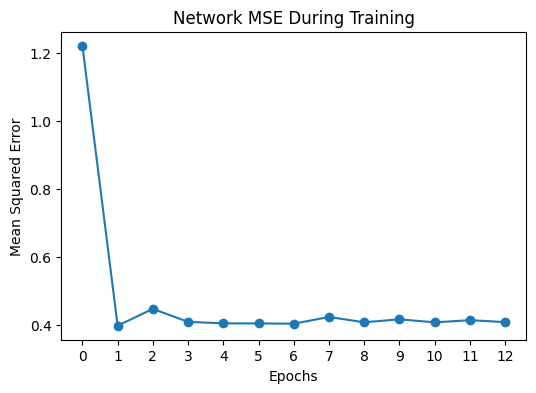

In [73]:
# Visualize the mean squared error over the training process
plt.figure(figsize = (6, 4))
Epochs = range(len(DNN.errors_))
plt.plot(Epochs, DNN.errors_, marker = "o")
plt.xticks(Epochs)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training")
plt.show()

Model Evaluation

In [75]:
lr_values = [0.001, 0.01, 0.1, 1]  # different values of learning rate to try
accuracy_values = []  # to store the accuracy for each learning rate value
# loop over each learning_rate value
for alpha in lr_values:
    DNN2 = DeepNeuralNet(layers = [784, 240, 120, 60, 10])
    print("Learning Rate:", alpha)
    DNN2.train(flat_train_X, onehot_train_y, alpha=alpha, epochs=2)
    accuracy = sum([int(DNN2.predict(x) == y) for x, y in zip(flat_test_X, y_test)])/len(onehot_test_y)
    accuracy_values.append(accuracy)

Learning Rate: 0.001


<ipython-input-71-078b1a4c69d5>:89: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Starting Cost (MSE) = 1.3655815707094558
Cost (MSE) after Epoch 1: = 0.4131164634053568
Cost (MSE) after Epoch 2: = 0.33652874955620654
Learning Rate: 0.01
Starting Cost (MSE) = 1.3679406139793462
Cost (MSE) after Epoch 1: = 0.26888107809157624
Cost (MSE) after Epoch 2: = 0.3425666397858824
Learning Rate: 0.1
Starting Cost (MSE) = 1.695904297296751
Cost (MSE) after Epoch 1: = 0.39471584448097036
Cost (MSE) after Epoch 2: = 0.44940651238419455
Learning Rate: 1
Starting Cost (MSE) = 1.0045966839651725
Cost (MSE) after Epoch 1: = 0.4506873394340092
Cost (MSE) after Epoch 2: = 0.45133280349240057


# Neural Network Implementation using TensorFlow

In [76]:
#Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import math

In [77]:
# Load the dataset
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [78]:
# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels using keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [79]:
# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# Compile the model
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 6ms/step - loss: 0.0347 - accuracy: 0.7663 - val_loss: 0.0254 - val_accuracy: 0.8267
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0237 - accuracy: 0.8410 - val_loss: 0.0227 - val_accuracy: 0.8448
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0216 - accuracy: 0.8544 - val_loss: 0.0215 - val_accuracy: 0.8559
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0203 - accuracy: 0.8636 - val_loss: 0.0211 - val_accuracy: 0.8592
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0193 - accuracy: 0.8702 - val_loss: 0.0204 - val_accuracy: 0.8608
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0187 - accuracy: 0.8748 - val_loss: 0.0197 - val_accuracy: 0.8673
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0180 - accuracy: 0.8803 - val_loss: 0.0192 - val_accur

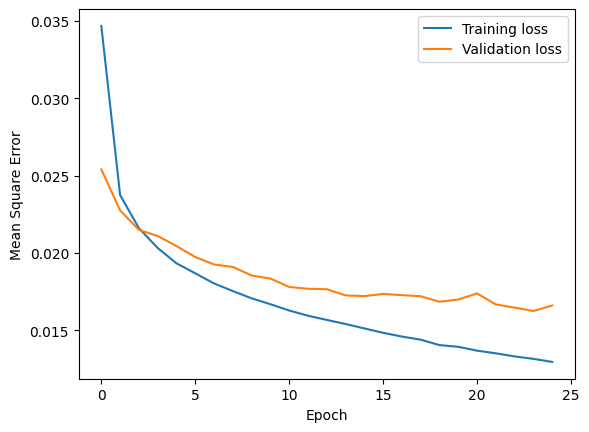

In [81]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
plt.show()

In [82]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predicted one-hot vectors to labels
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.8770
Test accuracy: 0.8769999742507935
313/313 [==============================] - 1s 2ms/step


The final evaluation results indicate that the trained neural network achieved a test accuracy of approximately 87.7%. This means that the model, after being trained on the Fashion MNIST dataset, correctly classified around 87.7% of the images in the test set.


#Conclusion


In conclusion, the implemented neural network demonstrated reasonable performance on the task of Fashion MNIST classification. It successfully learned to recognize patterns and features in the images, and the achieved accuracy provides a quantitative measure of its effectiveness. Further tuning, experimentation with different architectures, or optimization strategies could potentially enhance performance.